<a href="https://colab.research.google.com/github/JongBeomPark78/DAP/blob/main/Data_Analysis_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import io 
from google.colab import files
myfile = files.upload()

Saving 5000 Sales Records.csv to 5000 Sales Records (2).csv


In [3]:
data = pd.read_csv(io.BytesIO(myfile['5000 Sales Records.csv']))
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [4]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,1/11/2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,7/5/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88


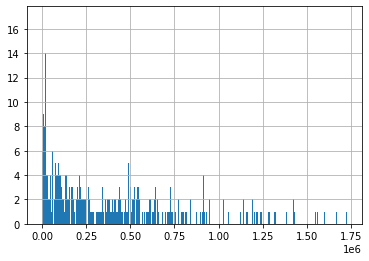

In [7]:
import matplotlib as plt
data['Total Profit'].hist(bins=5000)


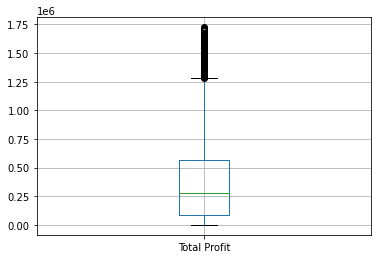

In [8]:
data.boxplot(column=['Total Profit'])

In [9]:
X = data[['Region','Units Sold','Unit Price', 'Total Profit']]
y = data['Unit Cost']


In [10]:
X = pd.get_dummies(X, prefix=['Region'], columns=['Region'])
X.head()

,Units Sold,Unit Price,Total Profit,Region_Asia,Region_Australia and Oceania,Region_Central America and the Caribbean,Region_Europe,Region_Middle East and North Africa,Region_North America,Region_Sub-Saharan Africa
0,552,255.28,52914.72,0,0,1,0,0,0,0
1,2167,152.58,119488.38,0,0,1,0,0,0,0
2,4778,47.45,74823.48,0,0,0,1,0,0,0
3,9016,205.70,798727.44,1,0,0,0,0,0,0
4,7542,152.58,415865.88,1,0,0,0,0,0,0


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=42)

LR = LinearRegression()
LR.fit(X_train, y_train)
y_prediction =  LR.predict(X_test)
y_prediction

array([ 90.3518742 ,   6.65709857, 345.23472699, ..., -29.86064548,
        -1.44724094, 330.5601132 ])

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# predicting the accuracy score
score=r2_score(y_test,y_prediction)

print('r2 socre is %.4f'%score)
print('root_mean_squared error of is %.2f'%np.sqrt(mean_squared_error(
    y_test, y_prediction)))

r2 socre is 0.9861
root_mean_squared error of is 20.49
